### In this notebook we will visualise and remove the outliers from each column of the dataset

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:

# load the sample dataset
d_set=sns.load_dataset('titanic')
d_set.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
# check for null values
d_set.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [97]:
# filling the null values of above mentioned columns
d_set['age'].fillna(d_set['age'].mean(), inplace=True)

# filling the embark column values using forward fill method
d_set['embarked'].fillna(method='ffill', inplace=True)

# filling the embark_town column with backward fill method
d_set['embark_town'].fillna(method='bfill', inplace=True)

# removing the deck column as it has no clear meaning
d_set.drop(columns=['deck'], inplace=True)


In [98]:
# confirming the null values
d_set.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Rremoving outliers using percentile method

In [99]:
# chescking the outlier using describe method
d_set.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


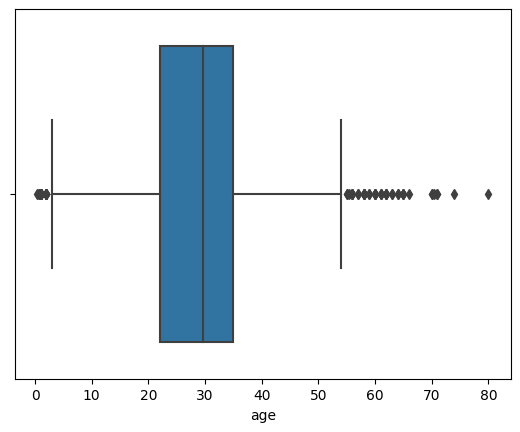

In [100]:
# outliers using boxplot
sns.boxplot(x='age', data=d_set)
plt.show()

### Result: As it can be seen fromthe figure above that the age column contains the outliers and we need to remove them

In [101]:
# to remove outliers we need to find out the lower and upper fence 
# lower_fence = Q1 - 1.5(IQR)
# lower_fence = Q3 + 1.5(IQR)
# Q1 = value at 25% percentile
# Q3 = value at 75% percentile

# for Q1
q1 = d_set['age'].quantile(0.25)

# for Q3
q3 = d_set['age'].quantile(0.75)

# for IQR
iqr=q3-q1

# for lower_fence
lower_fence = q1 - (1.5*iqr)

# for lower_fence
upper_fence = q3 + (1.5*iqr)

# display q1 and q3
print(q1, q3) 
 
# display the lower and upper fences
print(lower_fence, upper_fence)

22.0 35.0
2.5 54.5


In [102]:
# dataset after removal of outliers
new_d_set=d_set[(d_set['age']<=upper_fence) & (d_set['age']>=lower_fence)]

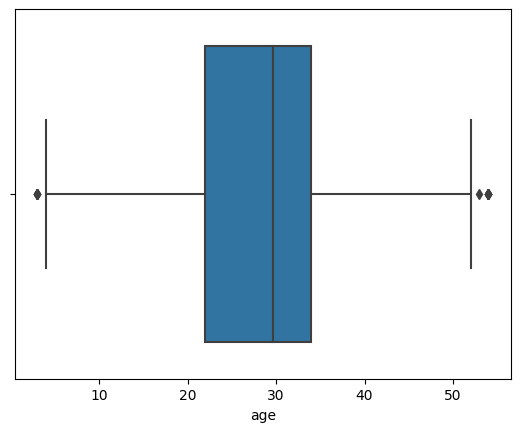

In [103]:
# now checking graphically
sns.boxplot(x='age', data=new_d_set)
plt.show()

# Result:
### The outliers are almost removed from the age column of the dataset

# Removing outliers using distibution method

C:\Users\mmm\AppData\Local\Temp\ipykernel_2676\2989697513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_d_set['fare'])


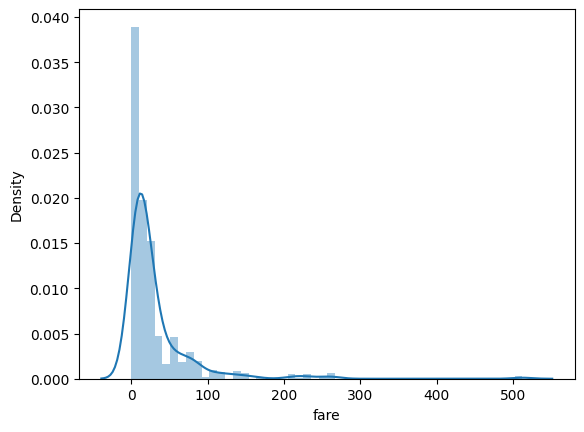

In [104]:
# fare column visualisation
sns.distplot(new_d_set['fare'])
plt.show()

### Result: as it can be seen the graph is -ve skewed and hence contains outliers

In [108]:
# in std we have min and max ranges as follows
# min = mean - 3rd std
# min = mean + 3rd std

# min and max ranges
min_range=new_d_set['fare'].mean() - (3 * new_d_set['fare'].std())
max_range=new_d_set['fare'].mean() + (3 * new_d_set['fare'].std())

In [106]:
# now removing outliers
new_data_set=new_d_set[(new_d_set['fare']<=max_range) & (new_d_set['fare']>=min_range)]


C:\Users\mmm\AppData\Local\Temp\ipykernel_2676\3295352246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data_set['fare'])


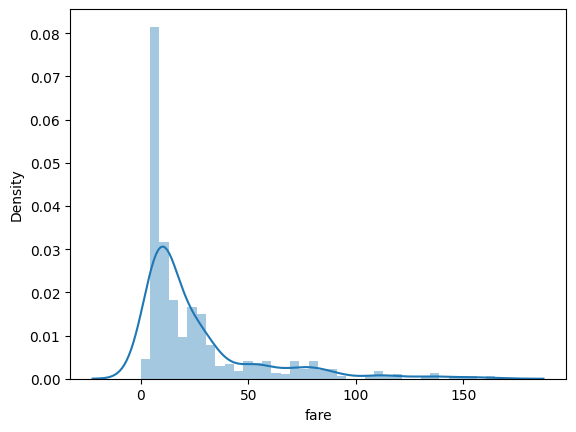

In [107]:
# checking graphically
sns.distplot(new_data_set['fare'])
# sns.boxplot(x='fare', data=new_data_set)
plt.show()

# Result:
### As it can be sen the outliers are almost removed, however, leaving behind some outliers to avoid data loss

# removing outliers using z score

In [110]:
# removing outliers using z score
# zscore = (x - mean) / std

zscore=(new_data_set['fare'] - new_data_set['fare'].mean()) / (new_data_set['fare'].std())

# now adding zscore as a column in the above dataset
new_data_set['zscore']= zscore
new_data_set

C:\Users\mmm\AppData\Local\Temp\ipykernel_2676\702320750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_set['zscore']= zscore


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,zscore
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,-0.644088
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.600878
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,-0.620423
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.963383
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,-0.616040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,-0.442496
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0.153512
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,-0.076126
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0.153512


C:\Users\mmm\AppData\Local\Temp\ipykernel_2676\1734631818.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_data_set['zscore'])


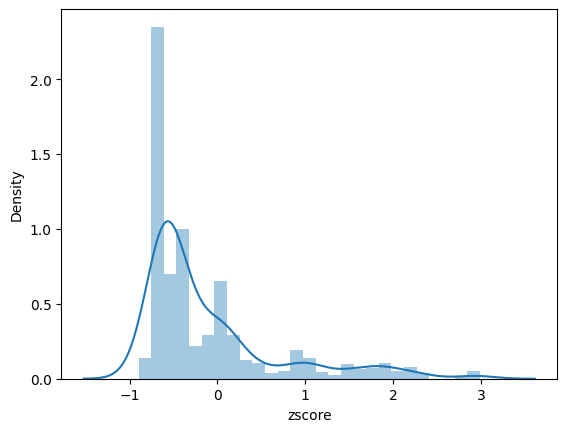

In [111]:
# now removing outliers as follows
z_data_set=new_data_set[new_data_set['zscore']<3]

# now visualisation as under
sns.distplot(z_data_set['zscore'])
plt.show()

# Result:
### Same graph as above